In [10]:
import numpy as np
import matplotlib.pyplot as plt

from subtle.utils.io import dicom_files, get_dicom_dirs, write_dicoms
from subtle.subtle_preprocess import scale_im, register_im, dcm_to_sitk
from glob import glob
import SimpleITK as sitk
from tqdm import tqdm_notebook as tqdm
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (10, 8)

def sag_to_ax(img_vol):
    return np.rot90(img_vol.transpose(1, 0, 2), axes=(1, 2), k=3)

<Figure size 720x576 with 0 Axes>

In [ ]:
t1_mprage, hdr1 = dicom_files('/home/srivathsa/projects/studies/gad/bch/RMP061/00006-SAG_T1_MPRAGE')
t1_mprage = sag_to_ax(t1_mprage)

t1_space, hdr2 = dicom_files('/home/srivathsa/projects/studies/gad/bch/RMP061/00019-SAG_T1_SPACE_C')
t1_space = sag_to_ax(t1_space)

In [ ]:
plt.imshow(np.hstack([t1_mprage[128], t1_space[128]]))

In [ ]:
t1_space_hist = scale_im(t1_mprage, t1_space, levels=10000, points=256, mean_intensity=True)

In [ ]:
plt.imshow(t1_space_hist[128])

In [2]:
smr_path = '/home/srivathsa/projects/studies/gad/bch/data/sre/results'
data_path = '/home/srivathsa/projects/studies/gad/bch/data'

cases = sorted([d.split('/')[-1] for d in glob('{}/RMP*'.format(data_path))])

find_sre = lambda case: [sp for sp in glob('{}/RMP*'.format(smr_path)) if sp.split('/')[-1].split('__')[0] == case]

for cnum in cases:
    sre_path = find_sre(cnum)
    if not sre_path:
        continue
    sre_path = sre_path[0]
    
    fname = sre_path.split('/')[-1].split('__')[-1]
    fname = '{}SMR'.format(fname)
    dirpath = '{}/{}/{}'.format(data_path, cnum, fname)
#     print("mkdir {};".format(dirpath))
#     print("cp {}/dicoms/*/*.dcm {}/;".format(sre_path, dirpath))

In [14]:
pmap = sitk.GetDefaultParameterMap('affine')
cases = ['RMP131_A']
for cnum in tqdm(cases, total=len(cases)):
    dirs = sorted([d for d in glob('{}/{}/*'.format(data_path, cnum))])
#     fp_t1post = [d for d in dirs if 'space' in d.lower()][0]
#     if len(dirs) == 3:
#         fp_t1pre = [d for d in dirs if 'smr' in d.lower()][0]
#     else:
#         fp_t1pre = [d for d in dirs if 'mprage' in d.lower()][0]
    fp_t1pre, fp_t1post = dirs
    
    t1pre, _ = dicom_files(fp_t1pre)
    t1post, hdr = dicom_files(fp_t1post)
    
    t1pre_sitk = dcm_to_sitk(fp_t1pre)
    t1post_sitk = dcm_to_sitk(fp_t1post)
    
    t1post_reg, _ = register_im(t1pre, t1post, param_map=pmap, ref_fixed=t1pre_sitk, ref_moving=t1post_sitk)
    
    fname = '{}_reg'.format(fp_t1post.split('/')[-1])
    write_dicoms(fp_t1pre, t1post_reg, '{}/{}/{}'.format(data_path, cnum, fname), series_desc_pre='', 
                 desc=hdr.SeriesDescription, series_num=hdr.SeriesNumber + 1)

/home/srivathsa/miniconda3/envs/py35gad/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/1 [00:00<?, ?it/s]

image registration
registration done, 7.08 s


In [5]:
t1pre, _ = dicom_files('/home/srivathsa/projects/studies/gad/bch/data/RMP131_A/00005-SAG_T1_MPRAGE_fast_brain_SMR')
t1post, _ = dicom_files('/home/srivathsa/projects/studies/gad/bch/data/RMP026/00018-SAG_T1_SPACE_C')

t1pre_sitk = dcm_to_sitk('/home/srivathsa/projects/studies/gad/bch/data/RMP026/00005-SAG_T1_MPRAGE_fast_SMR')
t1post_sitk = dcm_to_sitk('/home/srivathsa/projects/studies/gad/bch/data/RMP026/00018-SAG_T1_SPACE_C')

In [6]:
pmap = sitk.GetDefaultParameterMap('affine', 4)
t1post_reg, _ = dicom_files('/home/srivathsa/projects/studies/gad/bch/data/RMP026/00018-SAG_T1_SPACE_C_reg')

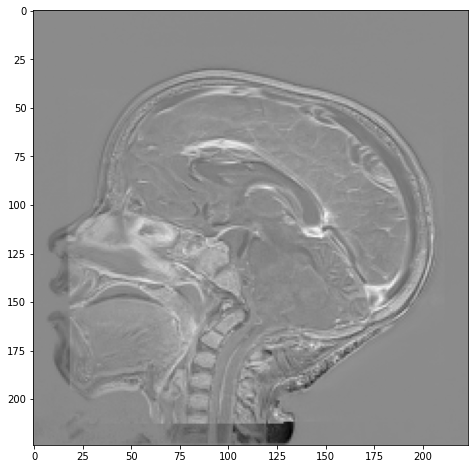

In [8]:
plt.imshow(t1post_reg[72] - t1pre[72])

In [12]:
d, _ = dicom_files('/home/srivathsa/projects/studies/gad/bch/data/RMP026/00018-SAG_T1_SPACE_C')
print(d.shape)

(192, 256, 256)
